<a href="https://colab.research.google.com/github/ChiaraAlba/Decision-Tree/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline


#Large Margin Classification

In [6]:
from sklearn import datasets 

iris = datasets.load_iris()
iris.keys()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
X = iris.data[:, (2,3)]   #features: petal length and petal width
y = iris.target

#let's get rid of iris-virginica
setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [72]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_clf = SVC(kernel = 'linear', C = float('inf'))
svm_clf.fit(X,y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

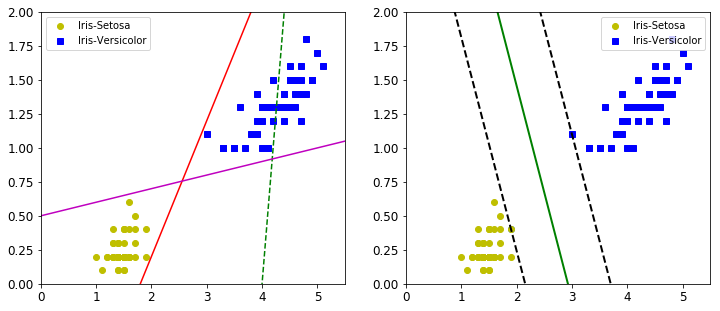

In [75]:
x_new = np.linspace(0,5.5,200)
pred_1 = 5*x_new - 20
pred_2 = x_new - 1.8
pred_3 = 0.1 * x_new + 0.5

def plot_svc_decision_boundary(svm_clf, x_min, x_max):
  w = svm_clf.coef_[0]
  b = svm_clf.intercept_[0]
  
  #decision boundary: w0*x0 +w1*x1+b --> x1 = -w0/w1*x0 -b/w1
  x0 = np.linspace(x_min, x_max, 200)
  decision_boundary = - w[0]/w[1] * x0 - b/w[1]
  
  margin = 1/w[1]
  corridor_up = decision_boundary + margin
  corridor_down = decision_boundary - margin
  
  support_vectors = svm_clf.support_vectors_
  plt.scatter(support_vectors[:, 0],support_vectors[:, 1])
  plt.plot(x0, decision_boundary, "g-", linewidth=2)
  plt.plot(x0, corridor_up, "k--", linewidth=2)
  plt.plot(x0, corridor_down, "k--", linewidth=2)
  
plt.figure(figsize=(12,5))
  
plt.subplot(121)
plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', label = 'Iris-Setosa')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs', label = 'Iris-Versicolor')
plt.plot(x_new, pred_1, 'g--')
plt.plot(x_new, pred_2, 'r-')
plt.plot(x_new, pred_3,'m-')
plt.axis([0,5.5,0,2])
plt.legend(loc=0)
  
plt.subplot(122)
plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', label = 'Iris-Setosa')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs', label = 'Iris-Versicolor')
plot_svc_decision_boundary(svm_clf,0,5.5)
plt.legend(loc=0)
plt.axis([0, 5.5, 0, 2])
plt.show()


In [95]:
from sklearn.svm import LinearSVC
X = iris.data[:, (2,3)]   #features: petal length and petal width
y = (iris.target==2).astype(np.int)

linearSVM_C1 = Pipeline([
    ('std_scaler', StandardScaler()),
    ('linearSVM', LinearSVC(C=1, loss='hinge'))
])

linearSVM_C100 = Pipeline([
    ('std_scaler', StandardScaler()),
    ('linearSVM', LinearSVC(C=100, loss='hinge'))
])


linearSVM_C1.fit(X,y)
linearSVM_C100.fit(X,y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearSVM',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [0]:
def plot_svcLINEAR_decision_boundary(svm_clf, x_min, x_max):
  w = svm_clf.coef_[0]
  b = svm_clf.intercept_[0]
  
  #decision boundary: w0*x0 +w1*x1+b = 0 --> x1 = -w0/w1*x0 -b/w1
  x0 = np.linspace(x_min, x_max, 200)
  decision_boundary = - w[0]/w[1] * x0 - b/w[1]
  
  margin = 1/w[1]
  corridor_up = decision_boundary + margin
  corridor_down = decision_boundary - margin
  plt.plot(x0, decision_boundary, "g-", linewidth=2)
  plt.plot(x0, corridor_up, "k--", linewidth=2)
  plt.plot(x0, corridor_down, "k--", linewidth=2)
  

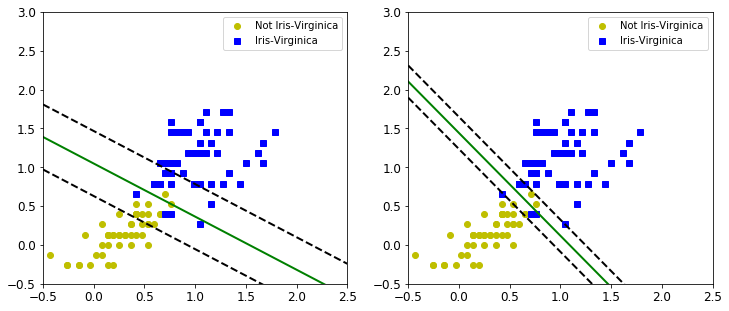

In [98]:
X_new = np.linspace(3,7,200)

X_reg = linearSVM_C1['std_scaler'].transform(X, copy = True)

plt.figure(figsize=(12,5))
  
plt.subplot(121)
plt.plot((X_reg[:,0][y==0]), X_reg[:,1][y==0], 'yo', label = 'Not Iris-Virginica')
plt.plot(X_reg[:,0][y==1], X_reg[:,1][y==1], 'bs', label = 'Iris-Virginica')
plt.axis([-0.5,2.5,-0.5,3])
plot_svcLINEAR_decision_boundary(linearSVM_C1['linearSVM'],-0.5, 2.5)
plt.legend(loc=0)
  
plt.subplot(122)
plt.plot(X_reg[:,0][y==0], X_reg[:,1][y==0], 'yo', label = 'Not Iris-Virginica')
plt.plot(X_reg[:,0][y==1], X_reg[:,1][y==1], 'bs', label = 'Iris-Virginica')
plt.axis([-0.5,2.5,-0.5,3])
plot_svcLINEAR_decision_boundary(linearSVM_C100['linearSVM'],-0.5, 2.5)
plt.legend(loc=0)
plt.show()

In [89]:
linearSVM_C1['linearSVM'].coef_

array([[1.63336364, 2.38800176]])